# ANN model for Cancer prediction


## Datadownload from Kaggle using Kaggle API

In [ ]:
!pip install kaggle

In [1]:
import zipfile
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

os.environ['KAGGLE_USERNAME'] = 'neelakandanrakesh'
os.environ['KAGGLE_KEY'] = '10cb8aa4d8d41086d39a366f0a692a31'


In [16]:
!kaggle datasets download -d erdemtaha/cancer-data -p "C:/Users/Lenovo/Desktop/Interview/" --force



  0%|          | 0.00/48.6k [00:00<?, ?B/s]
100%|##########| 48.6k/48.6k [00:00<00:00, 3.64MB/s]


In [20]:
with zipfile.ZipFile("C:/Users/Lenovo/Desktop/Interview/cancer-data.zip", 'r') as zip_ref:
    zip_ref.extractall("C:/Users/Lenovo/Desktop/Interview/")


## Loading and understanding the data

In [2]:
df = pd.read_csv("C:/Users/Lenovo/Desktop/Interview/Cancer_Data.csv")
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.shape

(569, 33)

In [4]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


## Data encoding

In [6]:
# Define the encoding dictionary
encode_dict = {"M": 1, "B": 0}

# Use the map() method to replace the values in the column
df["diagnosis"] = df["diagnosis"].map(encode_dict)


In [ ]:


# Define the encoding dictionary
encode_dict = {"M": 1, "B": 0}

# Use the map() method to replace the values in the column
df["diagnosis"] = df["diagnosis"].map(encode_dict)


In [7]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

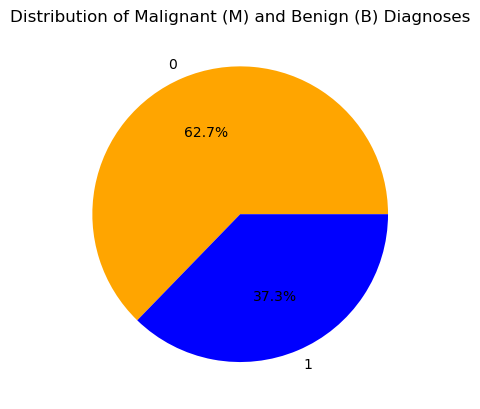

In [8]:


# Count the number of occurrences of each value
counts = df["diagnosis"].value_counts()

# Define the colors for the pie chart
colors = ["orange", "blue"]

# Create a pie chart to visualize the distribution
plt.pie(counts.values, labels=counts.index, colors=colors, autopct="%1.1f%%")
plt.title("Distribution of Malignant (M) and Benign (B) Diagnoses")
plt.show()


## Feature engineering

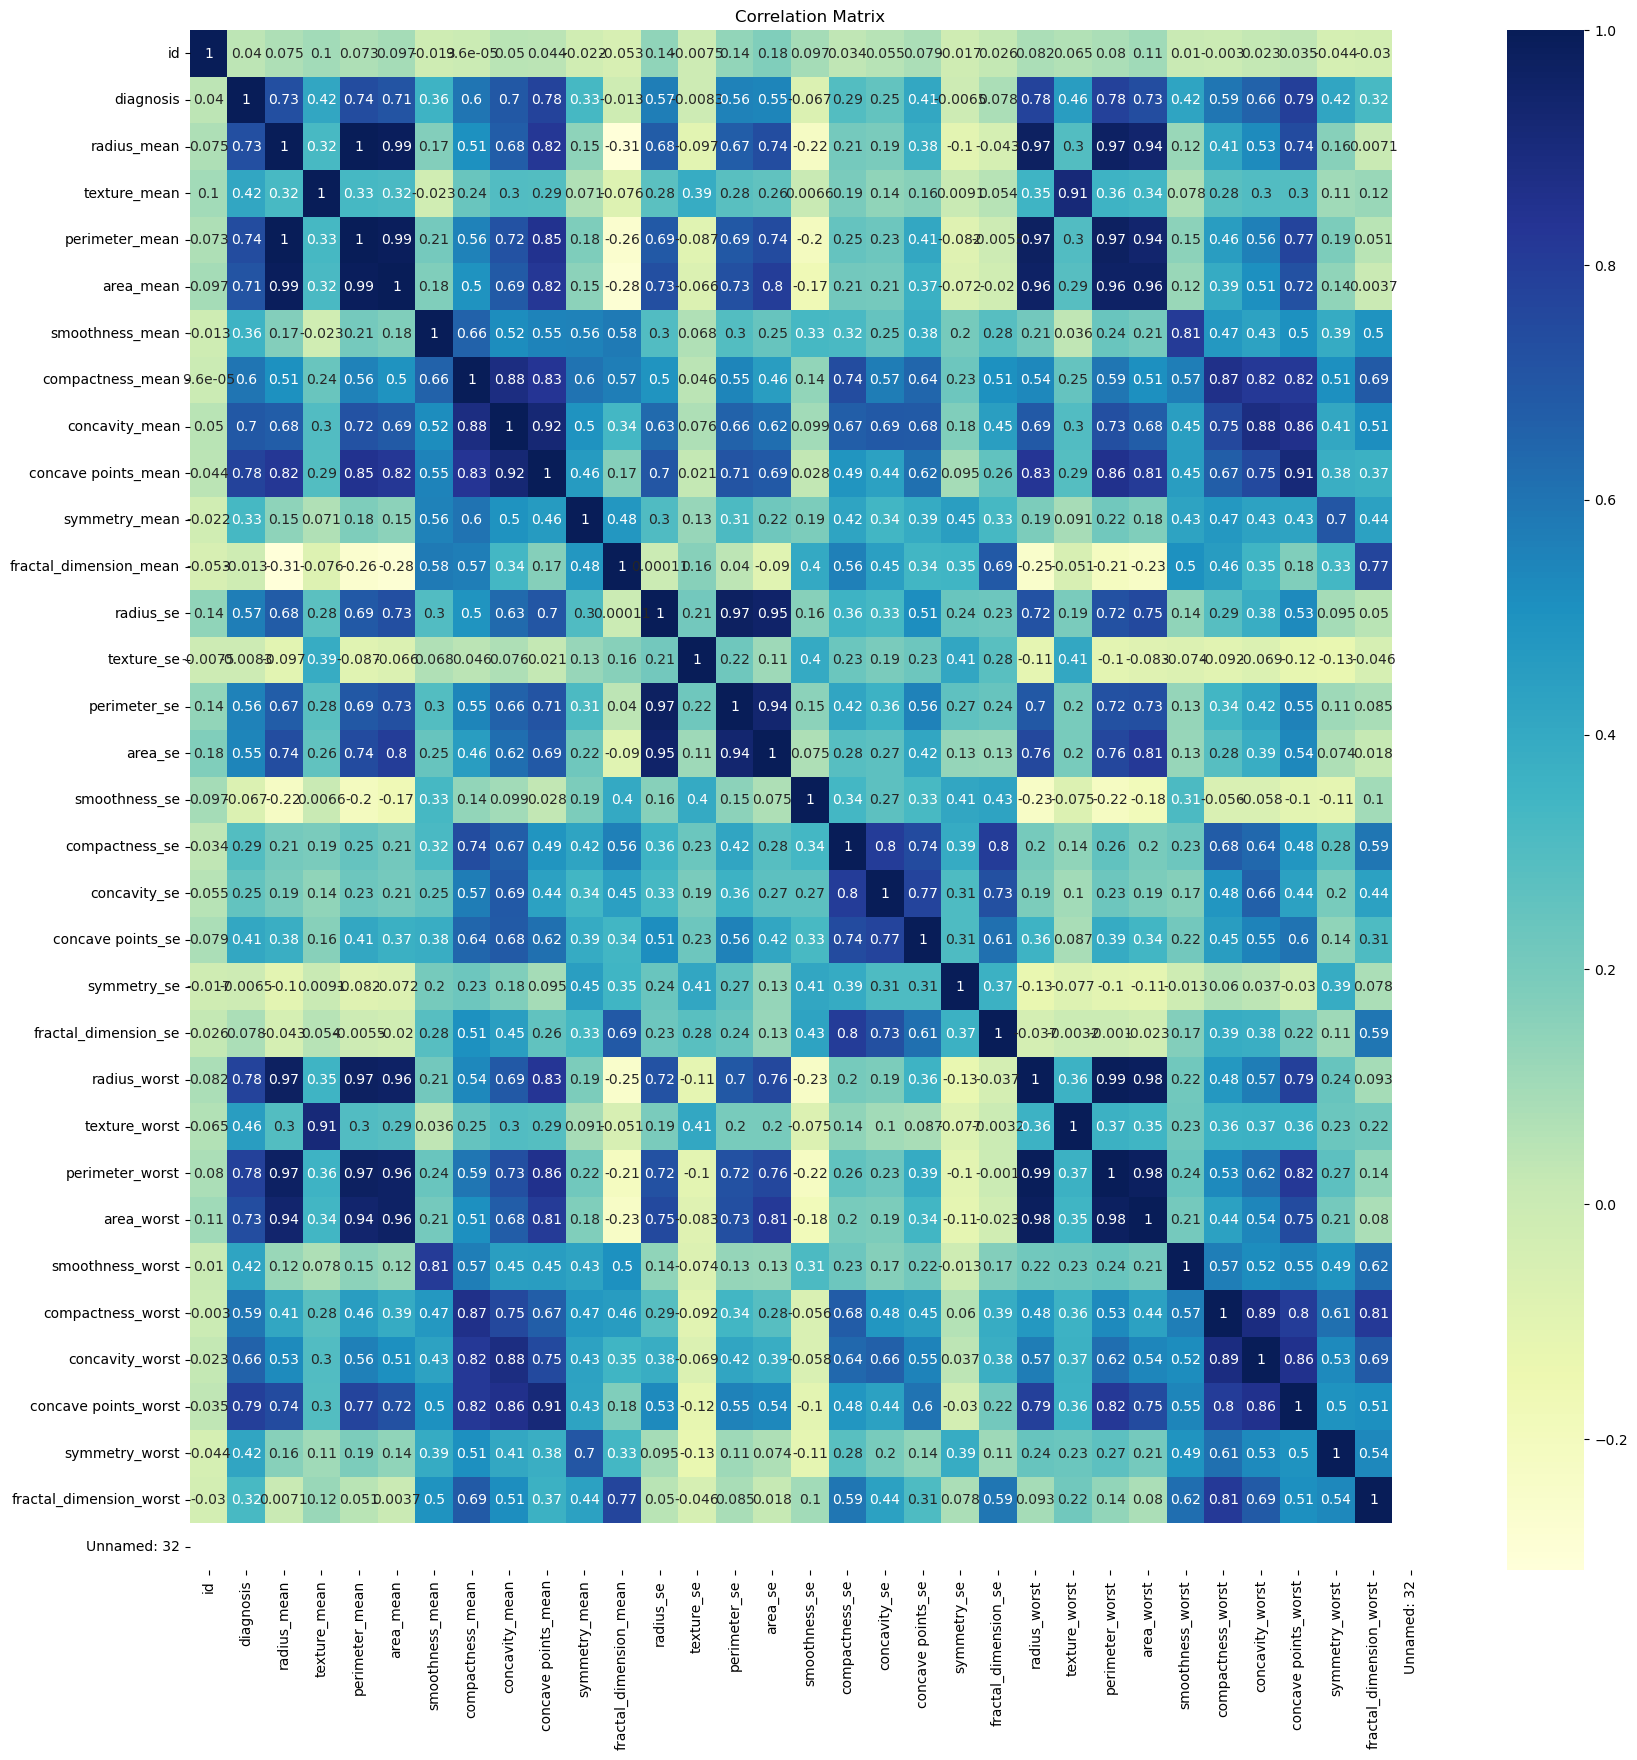

In [9]:
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()


In [10]:
df.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872,NaN
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN


In [11]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Get the features with a correlation coefficient above 0.7
high_corr_features = corr_matrix[abs(corr_matrix) > 0.7].stack().reset_index().rename(columns={0: "correlation"})
high_corr_features = high_corr_features[high_corr_features["level_0"] != high_corr_features["level_1"]]

# Print the high-correlation features
print(high_corr_features)


                     level_0                 level_1  correlation
2                  diagnosis             radius_mean     0.730029
3                  diagnosis          perimeter_mean     0.742636
4                  diagnosis               area_mean     0.708984
5                  diagnosis     concave points_mean     0.776614
6                  diagnosis            radius_worst     0.776454
..                       ...                     ...          ...
180     concave points_worst              area_worst     0.747419
181     concave points_worst       compactness_worst     0.801080
182     concave points_worst         concavity_worst     0.855434
185  fractal_dimension_worst  fractal_dimension_mean     0.767297
186  fractal_dimension_worst       compactness_worst     0.810455

[156 rows x 3 columns]


In [12]:
from sklearn.preprocessing import MinMaxScaler

# Define the scaler
scaler = MinMaxScaler()

# Select all columns except the "diagnosis" column
cols_to_normalize = df.columns.drop("diagnosis")

# Apply normalization to the selected columns
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

# Print the normalized DataFrame
print(df.head())


         id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  0.000915          1     0.521037      0.022658        0.545989   0.363733   
1  0.000915          1     0.643144      0.272574        0.615783   0.501591   
2  0.092495          1     0.601496      0.390260        0.595743   0.449417   
3  0.092547          1     0.210090      0.360839        0.233501   0.102906   
4  0.092559          1     0.629893      0.156578        0.630986   0.489290   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         0.593753          0.792037        0.703140             0.731113   
1         0.289880          0.181768        0.203608             0.348757   
2         0.514309          0.431017        0.462512             0.635686   
3         0.811321          0.811361        0.565604             0.522863   
4         0.430351          0.347893        0.463918             0.518390   

   ...  texture_worst  perimeter_worst  area_worst  smoo

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


## ANN model creation

### model before selecting important features

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop("diagnosis", axis=1), df["diagnosis"], test_size=0.2, random_state=42)

# Normalize the dataset using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy:", accuracy)


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


Epoch 1/50
15/15 [==============================] - 1s 19ms/step - loss: nan - accuracy: 0.6286 - val_loss: nan - val_accuracy: 0.6228
Epoch 2/50
15/15 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.6286 - val_loss: nan - val_accuracy: 0.6228
Epoch 3/50
15/15 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.6286 - val_loss: nan - val_accuracy: 0.6228
Epoch 4/50
15/15 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.6286 - val_loss: nan - val_accuracy: 0.6228
Epoch 5/50
15/15 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.6286 - val_loss: nan - val_accuracy: 0.6228
Epoch 6/50
15/15 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.6286 - val_loss: nan - val_accuracy: 0.6228
Epoch 7/50
15/15 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6286 - val_loss: nan - val_accuracy: 0.6228
Epoch 8/50
15/15 [==============================] - 0s 3ms/st

Accracy seems pretty low: 0.62

### model after selecting only top 5 features with high correlation coefficients

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense


# Calculate the correlation coefficients between each feature and the target variable
corr_scores = df.corr()["diagnosis"].abs().sort_values(ascending=False)

# Select the top n features with the highest correlation coefficients
n = 5
top_features = corr_scores[1:n+1].index.tolist()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[top_features], df["diagnosis"], test_size=0.2, random_state=42)

# Normalize the dataset using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy:", accuracy)


Epoch 1/50
15/15 [==============================] - 1s 11ms/step - loss: 0.6876 - accuracy: 0.7297 - val_loss: 0.6689 - val_accuracy: 0.9211
Epoch 2/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6599 - accuracy: 0.8549 - val_loss: 0.6387 - val_accuracy: 0.9035
Epoch 3/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6269 - accuracy: 0.9165 - val_loss: 0.5955 - val_accuracy: 0.9649
Epoch 4/50
15/15 [==============================] - 0s 3ms/step - loss: 0.5788 - accuracy: 0.9297 - val_loss: 0.5385 - val_accuracy: 0.9561
Epoch 5/50
15/15 [==============================] - 0s 3ms/step - loss: 0.5168 - accuracy: 0.9385 - val_loss: 0.4667 - val_accuracy: 0.9474
Epoch 6/50
15/15 [==============================] - 0s 3ms/step - loss: 0.4450 - accuracy: 0.9363 - val_loss: 0.3906 - val_accuracy: 0.9474
Epoch 7/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3710 - accuracy: 0.9407 - val_loss: 0.3150 - val_accuracy: 0.9561
Epoch 8/50
15/15 [=

After selecting best features the accuracy seems to have improved considerably

In [15]:
top_features

['concave points_worst',
 'perimeter_worst',
 'concave points_mean',
 'radius_worst',
 'perimeter_mean']

### saving and loading the model

In [16]:
import pickle
# Save the trained model as a pickle file
with open("C:/Users/Lenovo/Desktop/Interview/trained_model.pkl", "wb") as f:
    pickle.dump(model, f)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-04-18 19:15:06         1827
metadata.json                                  2023-04-18 19:15:06           64
variables.h5                                   2023-04-18 19:15:06        51752


In [17]:
# Load the trained model from the pickle file
with open("C:/Users/Lenovo/Desktop/Interview/trained_model.pkl", "rb") as f:
    model = pickle.load(f)


Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-04-18 19:15:06         1827
metadata.json                                  2023-04-18 19:15:06           64
variables.h5                                   2023-04-18 19:15:06        51752
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars


In [18]:
X_test 

array([[ 3.48797251e-01,  2.11275482e-01,  1.89910537e-01,
         2.29953951e-01,  2.35951060e-01],
       [ 6.14776632e-01,  5.66366733e-01,  3.95178926e-01,
         5.91404137e-01,  5.38341158e-01],
       [ 5.20274914e-01,  3.57938081e-01,  4.01938370e-01,
         3.86740735e-01,  3.82557974e-01],
       [ 2.53264605e-01,  1.78536933e-01,  1.39115308e-01,
         1.53570645e-01,  2.38654147e-01],
       [ 2.37731959e-01,  1.23481267e-01,  1.28926441e-01,
         1.30911483e-01,  1.90140845e-01],
       [ 9.10652921e-01,  6.61430532e-01,  7.55467197e-01,
         6.23565529e-01,  6.55712050e-01],
       [ 8.35738832e-01,  7.14300239e-01,  7.46023857e-01,
         6.93735838e-01,  7.06217101e-01],
       [ 5.00343643e-01,  4.08774338e-01,  3.95278330e-01,
         4.14151012e-01,  4.77166026e-01],
       [ 5.86941581e-01,  2.14376493e-01,  3.47266402e-01,
         2.50420291e-01,  2.74363352e-01],
       [ 2.13814433e-01,  2.37456154e-01,  6.65506958e-02,
         2.36166947e-01

### COnfusion matrix

In [19]:
from sklearn.metrics import confusion_matrix
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

4/4 [==============================] - 0s 5ms/step
Confusion Matrix:
 [[69  2]
 [ 1 42]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [20]:
# Display the results of the predictions for the test set
print("Predictions for the test set:\n", y_pred)

Predictions for the test set:
 [[False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ Tru

In [25]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 


Saved model to disk


In [26]:
# later...
 
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk
